In [5]:
import json
import requests
import pandas as pd
from k import api_key
import matplotlib.pyplot as plt
import csv
import numpy as np

In [9]:
cx = "0004244157511163772131:swmjc3vgy_a"
url = "https://www.googleapis.com/customsearch/v1?"

total_results = []
years = []



for x in range(1, 11, 1):
    print(x)
    timeperiod1 = 'y' + str(x)
    parameters1 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod1
              }
    timeperiod2 = 'y' + str(x+1)
    parameters2 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod2
              }
    
    page1 = requests.request("GET", url, params=parameters1)
    page2 = requests.request("GET", url, params=parameters2)

    
    results1 = json.loads(page1.text)
    results2 = json.loads(page2.text)

    
    #print(results)
    hits1 = results1["searchInformation"]["totalResults"]
    hits1 = int(hits1)
    hits2 = results2["searchInformation"]["totalResults"]
    hits2 = int(hits2)

    
    #print(hits)
    hits_permon = (hits2 - hits1) +hits1
    total_results.append(hits_permon)
    years.append("y" + str(x))

1
2
3
4
5
6
7
8
9
10


In [10]:
mon_df = pd.DataFrame({
    "Years": years,
    "Results": total_results
    })
mon_df

,Years,Results
0,y1,56400
1,y2,66800
2,y3,72200
3,y4,74600
4,y5,77900
5,y6,79700
6,y7,81600
7,y8,82100
8,y9,81500
9,y10,82900


<function matplotlib.pyplot.show(*args, **kw)>

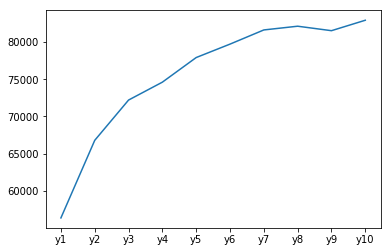

In [12]:
plt.plot(years, total_results)
plt.show

In [13]:
mon_df.to_csv('gangnamstyle_10y_file.csv', index = None, header=True)